Sakshi Kulshreshtha: 16BCE1198

Regularization is a method for adding additional constraints or penalty to a model, with the goal of preventing overfitting and improving generalization. 

Instead of minimizing a loss function E(X,Y), the loss function to minimize becomes E(X,Y)+α∥w∥, where w is the vector of model coefficients, ∥⋅∥ is typically L1 or L2 norm and α is a tunable free parameter, specifying the amount of regularization. So α=0 implies an unregularized model. 

For regression models, the two widely used regularization methods are L1 and L2 regularization, also called lasso and ridge regression when applied in linear regression.

L2 regularization (called ridge regression for linear regression) adds the L2 norm penalty (α.∑wi^2) to the loss function.
Since the coefficients are squared in the penalty expression, it has a different effect from L1-norm. It forces the coefficient values to be spread out more equally.

The effect of this is that models are much more stable (coefficients do not fluctuate on small data changes as is the case with unregularized or L1 models).

L2/ Ridge Regularisation without using sklearn

Initial likelihood:
-17.328679514
Optimization terminated successfully.
         Current function value: 0.000007
         Iterations: 27
         Function evaluations: 28
         Gradient evaluations: 28
Final betas:
[  -3.6342172   -16.21124609 -105.16129661  -15.36013003   60.29706066
   50.8584613    -4.40720696   47.89388897  -20.50393476  -74.03106657
   45.68589887  -16.30426796   24.98605435    8.26918546 -109.38965908
  -96.74838342  127.66503177   24.55786126   49.19576143   43.31503823]
Final lik:
-7.47143946578e-06
Initial likelihood:
-17.328679514
         Current function value: 0.545844
         Iterations: 14
         Function evaluations: 117
         Gradient evaluations: 105
Final betas:
[ -0.08963215  -2.92978934 -16.66970485  -1.9867422    9.32810268
   7.73534786  -0.788008     7.81655711  -3.17791053 -11.51342403
   6.87001141  -2.4766094    3.61115979   1.53891454 -17.83932698
 -15.25970724  20.092519     4.05642863   7.83136304   7.37350982]
Final lik:
-1.4445

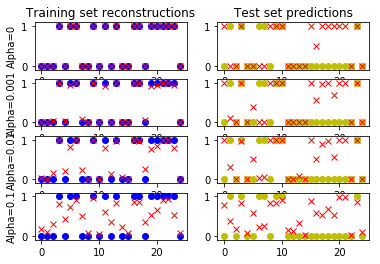

In [1]:
from scipy.optimize.optimize import fmin_cg, fmin_bfgs, fmin
import numpy as np

def sigmoid(x):
    return 1.0 / (1.0 + np.exp(-x))

class SyntheticClassifierData():
    def __init__(self, N, d):        
        #Create N instances of d dimensional input vectors and a 1D class label
        means = .05 * np.random.randn(2, d)
        self.X_train = np.zeros((N, d))
        self.Y_train = np.zeros(N)       
        
        for i in range(N):
            if np.random.random() > .5:
                y = 1
            else:
                y = 0
            self.X_train[i, :] = np.random.random(d) + means[y, :]
            self.Y_train[i] = 2.0 * y - 1
        
        self.X_test = np.zeros((N, d))
        self.Y_test = np.zeros(N)       
        
        for i in range(N):
            if np.random.randn() > .5:
                y = 1
            else:
                y = 0
            self.X_test[i, :] = np.random.random(d) + means[y, :]
            self.Y_test[i] = 2.0 * y - 1
    
class LogisticRegression():
    #A simple logistic regression model with L2 regularization
    def __init__(self, x_train=None, y_train=None, x_test=None, y_test=None, alpha=.1, synthetic=False):
        # Set L2 regularization strength
        self.alpha = alpha
        
        # Set the data.
        self.set_data(x_train, y_train, x_test, y_test)
        
        # Initialize parameters to zero
        self.betas = np.zeros(self.x_train.shape[1])
        
    def negative_lik(self, betas):
        return -1 * self.lik(betas)
    
    def lik(self, betas):
        #Likelihood of the data under the current settings of parameters
        l = 0
        for i in range(self.n):
            l += log(sigmoid(self.y_train[i] * np.dot(betas, self.x_train[i,:])))
            
        # Prior likelihood
        for k in range(1, self.x_train.shape[1]):
            l -= (self.alpha / 2.0) * self.betas[k]**2
        return l
    
    def train(self):
        #Define the gradient
        # Define the derivative of the likelihood with respect to beta_k.
        # Multiply by -1 because we have to minimize
        dB_k = lambda B, k : (k > 0) * self.alpha * B[k] - np.sum([self.y_train[i] * self.x_train[i, k] * \
                                                                   sigmoid(-self.y_train[i] * np.dot(B, self.x_train[i,:])) \
                                                                   for i in range(self.n)])
        
        # The full gradient is an array of componentwise derivatives
        dB = lambda B : np.array([dB_k(B, k) for k in range(self.x_train.shape[1])])
        
        # Optimization
        self.betas = fmin_bfgs(self.negative_lik, self.betas, fprime=dB)
        
    def set_data(self, x_train, y_train, x_test, y_test):
        self.x_train = x_train
        self.y_train = y_train
        self.x_test = x_test
        self.y_test = y_test
        self.n = y_train.shape[0]
        
    def training_reconstruction(self):
        p_y1 = np.zeros(self.n)
        for i in range(self.n):
            p_y1[i] = sigmoid(np.dot(self.betas, self.x_train[i,:]))
        return p_y1
    
    def test_predictions(self):
        p_y1 = np.zeros(self.n)
        for i in range(self.n):
            p_y1[i] = sigmoid(np.dot(self.betas, self.x_test[i,:]))
        return p_y1
    
    def plot_training_reconstruction(self):
        plot(np.arange(self.n), .5 + .5 * self.y_train, 'bo')
        plot(np.arange(self.n), self.training_reconstruction(), 'rx')
        ylim([-.1, 1.1])
    
    def plot_test_predictions(self):
        plot(np.arange(self.n), .5 + .5 * self.y_test, 'yo')
        plot(np.arange(self.n), self.test_predictions(), 'rx')
        ylim([-.1, 1.1])
    
if __name__ == "__main__":    
    from pylab import *
    # Create 20 dimensional data set with 25 points- susceptible to overfitting.
    data = SyntheticClassifierData(25, 20)
    
    # Run for a variety of regularization strengths
    alphas = [0, .001, .01, .1]
    for j, a in enumerate(alphas):
        
        # Create a new learner, but use the same data for each run
        lr = LogisticRegression(x_train=data.X_train, y_train=data.Y_train,x_test=data.X_test, y_test=data.Y_test,alpha=a)
        
        print ("Initial likelihood:")
        print (lr.lik(lr.betas))
        
        # Train the model
        lr.train()
       
        # Display execution info
        print ("Final betas:")
        print (lr.betas)
        print ("Final lik:")
        print (lr.lik(lr.betas))
        
        # Plot the results
        subplot(len(alphas), 2, 2*j + 1)
        lr.plot_training_reconstruction()
        ylabel("Alpha=%s" % a)
        
        if j == 0:
            title("Training set reconstructions")
        
        subplot(len(alphas), 2, 2*j + 2)
        lr.plot_test_predictions()
        
        if j == 0:
            title("Test set predictions")
            
    show()